# Lending Club Case Study

## Business Objective 

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#Importing required libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Understanding
loan_amnt :  Amount applied by the borrower               
funded_amnt: Amount recommended/Approved by the Agent or Lending Club                    
funded_amnt_inv : Amound funded by the Investor and also the same amount is approved and credit to the borrower's account once the customer profile validation is done.                   
Loan_Status : We have 3 values [ Current , Fully Paid, Charged Off] .Current it is not scope to this requirement . Because we need Fully Paid and Charged Off Loan_status to find the default customers. Loan_Status is our Target Variable                   
Grade and Sub-Grades : Really useful driving variables


In [2]:
# Reading the loan dataset
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Getting the summary statistics for Numerical variables
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
# Getting the datatype information of all the columns in the loan dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5]:
# Get the total rows and columns in the loan dataset
df.shape

(39717, 111)

## Data Cleaning

In [6]:
#This columns are customer behavior variable related to the existing loans. This wont help for our requirement
df.iloc[:, 25:53].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   delinq_2yrs                  39717 non-null  int64  
 1   earliest_cr_line             39717 non-null  object 
 2   inq_last_6mths               39717 non-null  int64  
 3   mths_since_last_delinq       14035 non-null  float64
 4   mths_since_last_record       2786 non-null   float64
 5   open_acc                     39717 non-null  int64  
 6   pub_rec                      39717 non-null  int64  
 7   revol_bal                    39717 non-null  int64  
 8   revol_util                   39667 non-null  object 
 9   total_acc                    39717 non-null  int64  
 10  initial_list_status          39717 non-null  object 
 11  out_prncp                    39717 non-null  float64
 12  out_prncp_inv                39717 non-null  float64
 13  total_pymnt     

In [7]:
#This columns are customer behavior variable related to the existing loans. This wont help for our requirement.
#So dropping these above 28 columns
df.drop(df.iloc[:, 25:53],axis=1,inplace=True)

In [8]:
# After removing the 28 customer behavior variables and make sure to validate whether is it reflecting correctly as 83 columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                  

In [9]:
# Dropping the columns which is having all the values as Null 
df.dropna(how='all',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  object 
 6   int_rate                  39717 non-null  object 
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_title                 37258 non-null  object 
 11  emp_length                38642 non-null  object 
 12  home_ownership            39717 non-null  object 
 13  annual_inc                39717 non-null  float64
 14  verifi

In [10]:
# To view all the columns in the same page
pd.set_option('display.max_columns',None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,0.0,0,0.0,0.0


In [11]:
df['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

Since it has one value ,so we are dropping the pymnt_plan column

In [12]:
df['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

Since it has one value ,so we are dropping the above column

In [13]:
df['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

Since it has one value or blank ,so we are going to drop the above column

In [14]:
df['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

Since it has one value ,so we are going to drop the above column

In [15]:
df['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

Since it has one value or blank ,so we are going to drop the above column

In [16]:
# This columns are not needed for analysis because we dont get required information from the above columns
drop_columns=['id','member_id','url','desc','zip_code','addr_state','pymnt_plan','acc_now_delinq','chargeoff_within_12_mths',
              'delinq_amnt','tax_liens','emp_title']
df.drop(drop_columns,axis=1,inplace=True)

In [17]:
#Checking the Null percentage for all the columns 
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.027696
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [18]:
#Dropping the Null values which is present in pub_rec_bankruptcies column
df.dropna(subset=['pub_rec_bankruptcies'],inplace=True)
df.shape

(39020, 18)

In [19]:
#Checking the Null percentage for all the columns 
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.754997
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.028191
dti                     0.000000
pub_rec_bankruptcies    0.000000
dtype: float64

In [20]:
#Checking the unique values which is present in the emp_length column
df['emp_length'].value_counts()

10+ years    8760
< 1 year     4416
2 years      4304
3 years      4034
4 years      3391
5 years      3249
1 year       3148
6 years      2197
7 years      1751
8 years      1454
9 years      1241
Name: emp_length, dtype: int64

In [21]:
# Dropping the Null values which is present in the emp_length column
df.dropna(subset=['emp_length'],inplace=True)
df.shape

(37945, 18)

In [22]:
#Checking the Null percentage for all the columns 
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.026354
dti                     0.000000
pub_rec_bankruptcies    0.000000
dtype: float64

In [23]:
#Checking the unique values which is present in the title column
df['title'].value_counts()

Debt Consolidation                        2122
Debt Consolidation Loan                   1687
Personal Loan                              618
Consolidation                              500
debt consolidation                         480
                                          ... 
Natasha                                      1
Get Rid of Debt to Own a House               1
necessity                                    1
LCH no more cc debt!                         1
Merging 2 Accounts into one to save $$       1
Name: title, Length: 18732, dtype: int64

In [24]:
# Dropping the Null values which is present in the emp_length column
df.dropna(subset=['title'],inplace=True)
df.shape

(37935, 18)

In [25]:
#Checking the Null percentage for all the columns 
df.isnull().sum()*100/len(df)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [26]:
# Validating whether any null values present in row level also 
df[df.isna().any(axis=1)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,pub_rec_bankruptcies


We have ensure that there is no null values present both in column and row wise. 

In [27]:
#After removing the missing values ,we are printing the top 5 rows
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.94,0.0


In [28]:
# We are performing data manipulation for removing % from the int_rate Columns
df['int_rate']=df['int_rate'].apply(lambda x:x[:-1])
df['int_rate'].value_counts()

10.99    932
13.49    813
11.49    799
7.51     756
7.88     701
        ... 
17.46      1
17.44      1
20.52      1
16.01      1
11.22      1
Name: int_rate, Length: 337, dtype: int64

In [29]:
# Converting the object data type into float  for the int_rate Columns after removing the %
df['int_rate']=df['int_rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37935 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37935 non-null  int64  
 1   funded_amnt           37935 non-null  int64  
 2   funded_amnt_inv       37935 non-null  float64
 3   term                  37935 non-null  object 
 4   int_rate              37935 non-null  float64
 5   installment           37935 non-null  float64
 6   grade                 37935 non-null  object 
 7   sub_grade             37935 non-null  object 
 8   emp_length            37935 non-null  object 
 9   home_ownership        37935 non-null  object 
 10  annual_inc            37935 non-null  float64
 11  verification_status   37935 non-null  object 
 12  issue_d               37935 non-null  object 
 13  loan_status           37935 non-null  object 
 14  purpose               37935 non-null  object 
 15  title              

In [30]:
# Removing all the Current Loan holders which is not useful for this requirement
df=df[~(df['loan_status']=='Current')]
df.shape

(36837, 18)

In [31]:
#Validating the total counts for the Loan Status Category  column
df['loan_status'].value_counts()

Fully Paid     31557
Charged Off     5280
Name: loan_status, dtype: int64

In [32]:
#Validating the data types of all the columns after data cleaning and also after datatype conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36837 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36837 non-null  int64  
 1   funded_amnt           36837 non-null  int64  
 2   funded_amnt_inv       36837 non-null  float64
 3   term                  36837 non-null  object 
 4   int_rate              36837 non-null  float64
 5   installment           36837 non-null  float64
 6   grade                 36837 non-null  object 
 7   sub_grade             36837 non-null  object 
 8   emp_length            36837 non-null  object 
 9   home_ownership        36837 non-null  object 
 10  annual_inc            36837 non-null  float64
 11  verification_status   36837 non-null  object 
 12  issue_d               36837 non-null  object 
 13  loan_status           36837 non-null  object 
 14  purpose               36837 non-null  object 
 15  title              

## Data Analysis :Univariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

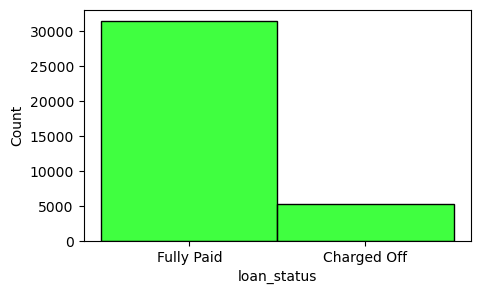

In [33]:
#Univariate Analysis
plt.figure(figsize=(5,3))
sns.histplot(data=df, x="loan_status", color="lime")

### Insights:
1. Around 5K customers are Charged Off from the total customers

B    11147
A     9517
C     7485
D     4865
E     2584
F      943
G      296
Name: grade, dtype: int64

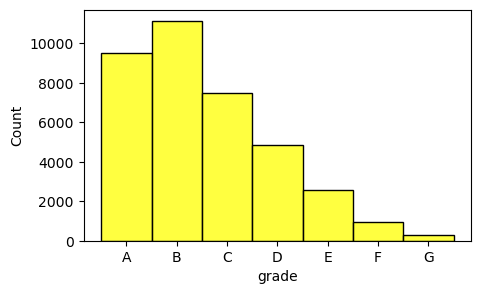

In [34]:
plt.figure(figsize=(5,3))
sns.histplot(data=df.sort_values('grade'), x="grade", color="yellow")
df['grade'].value_counts()

### Insights:
1. Most of the Customers are in B Grade, then followed by A, then C,D,E,F and G.

<AxesSubplot:xlabel='sub_grade', ylabel='Count'>

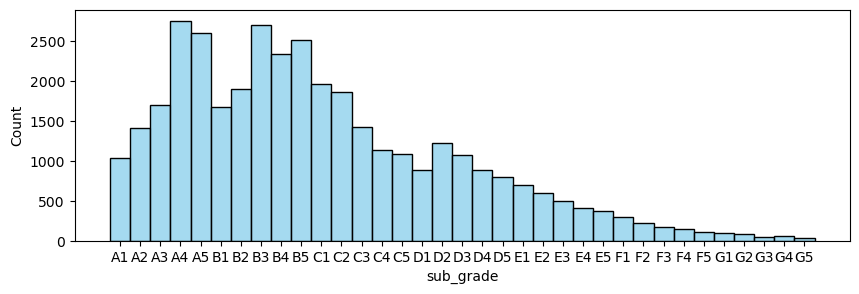

In [35]:
plt.figure(figsize=(10,3))
sns.histplot(data=df.sort_values('sub_grade'), x="sub_grade", color="skyblue")

### Insights:
1. Only A to B,increasing to decreasing  customer pattern is noticed within A and B sub-grade
2. From C to G, decreasing pattern is noticed within respective sub-grade

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

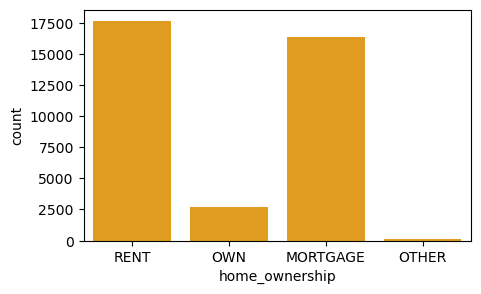

In [36]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x="home_ownership", color="orange")

### Insights:
1. Most of the customers staying in Rent, then followed by Mortgage and then Ownhouse

<AxesSubplot:xlabel='verification_status', ylabel='count'>

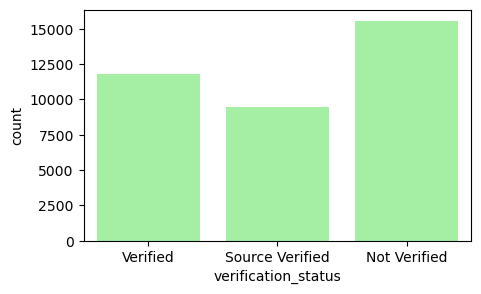

In [37]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x="verification_status", color="palegreen")

### Insights:
1. Most of the customers verification Status is Not Verified, then followed by Verified and then Source Verified

<AxesSubplot:xlabel='term', ylabel='count'>

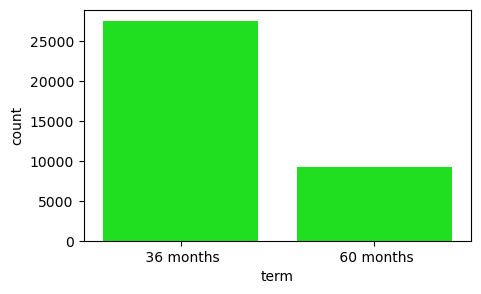

In [38]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x="term", color="lime")

### Insights:
1. Most of the customers took the loan for less tenure .ie 36 months(Approximate 75 percentage)

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Density'>

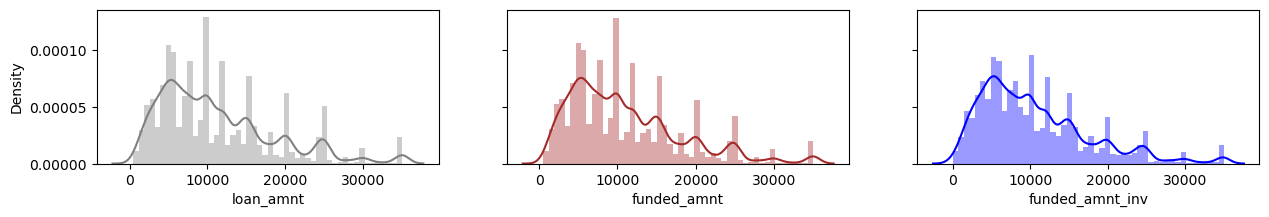

In [39]:
fig,axes=plt.subplots(1,3,figsize=(15,2),sharey=True)
sns.distplot(df["loan_amnt"], color="grey",ax=axes[0])
sns.distplot(df["funded_amnt"], color="brown",ax=axes[1])
sns.distplot(df["funded_amnt_inv"], color="blue",ax=axes[2])

### Insights:
For higher loan amount range request from the borrower is not approved the same amount or approved only with lesser amount

<AxesSubplot:xlabel='int_rate'>

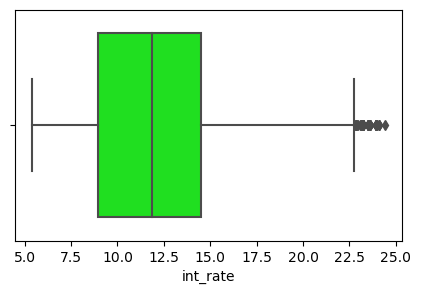

In [41]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x="int_rate", color="lime")

### Insights:
Noticed extreme values present in the Int_rate column(Outliers are present). We need to remove this to get good results in model building. Else it will impact the quality of the model results.

<AxesSubplot:xlabel='installment', ylabel='Count'>

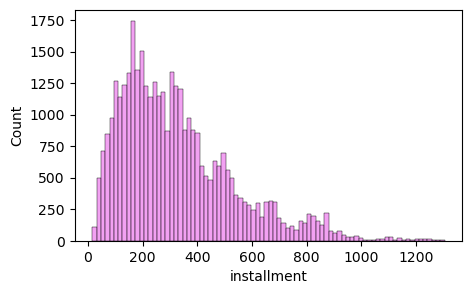

In [42]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x="installment", color="violet")

### Insights:
Most of the Installments are fall under 100 to 500

<AxesSubplot:xlabel='annual_inc'>

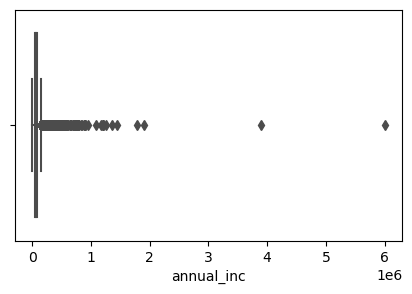

In [43]:
plt.figure(figsize=(5,3))
sns.boxplot(df["annual_inc"], color="orange")

### Insights:
Extreme values present in the annual_inc column. Need to remove this outliers for feature model building.

## Data Analysis : Bivariate Analysis

<AxesSubplot:xlabel='annual_inc', ylabel='funded_amnt_inv'>

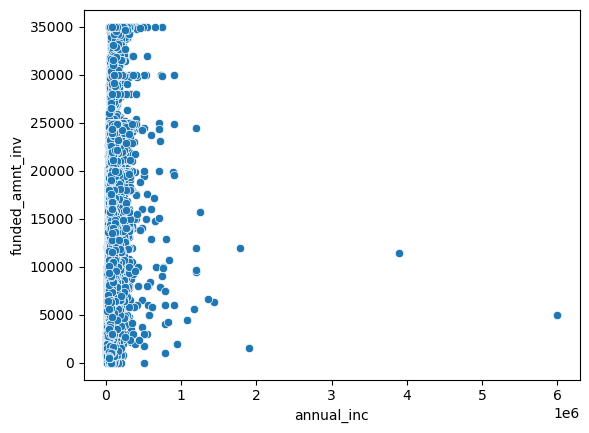

In [44]:
sns.scatterplot(y=df['funded_amnt_inv'],x=df['annual_inc'])

## Insights :
1. Most of the loans taken by the customer whose annual_inc is less than 1 and less than 2 lakh
2. Few Extreme values present in the annual_inc. We need to remove this for our future model building tasks

<AxesSubplot:xlabel='installment', ylabel='int_rate'>

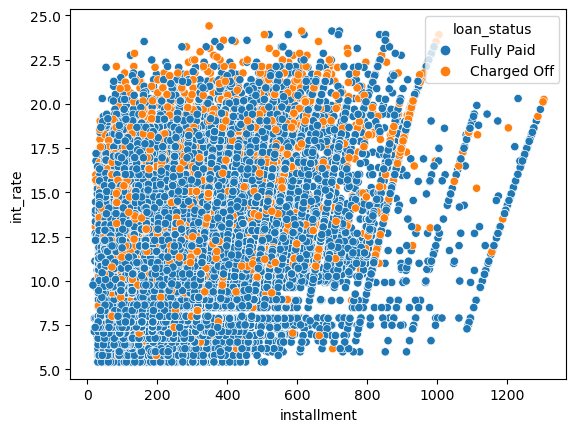

In [45]:
sns.scatterplot(y=df['int_rate'],x=df['installment'],hue=df['loan_status'])

## Insights:
1. If Interest rate increases, chances of charged off loan is very high 
2. If Installment is higher, chances of fully paid is high and also charged off loan is low.
3. If Interest rate is low, chances of fully paid is very high 

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

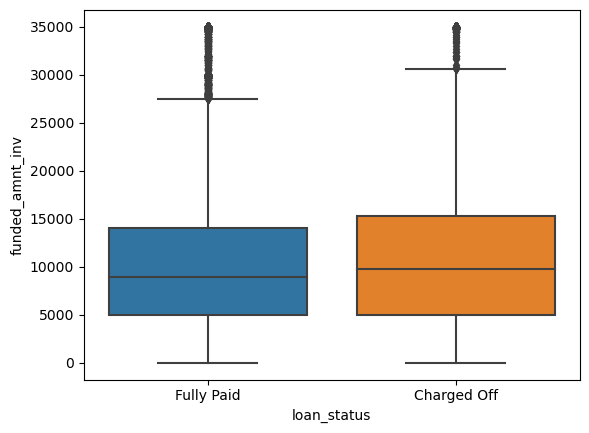

In [46]:
sns.boxplot(x=df['loan_status'],y=df['funded_amnt_inv']) 

## Insights :
1. Funded Amount and Loan Status does nt have any relation. It looks almost similar

<AxesSubplot:xlabel='sub_grade', ylabel='loan_amnt'>

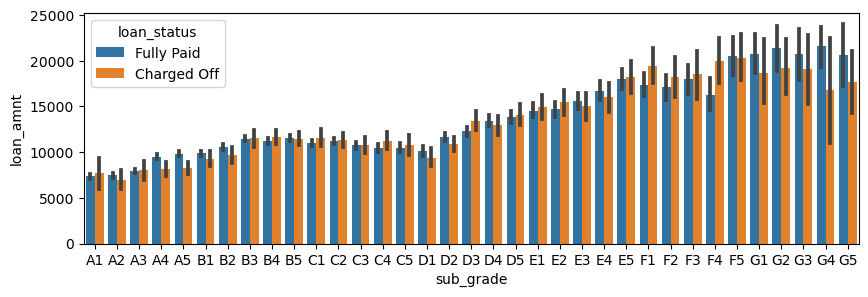

In [47]:
plt.figure(figsize=(10,3))
sns.barplot(x ='sub_grade', y = 'loan_amnt',hue='loan_status',data = df.sort_values('sub_grade'))

## Insights:
1. If the Loan amount is increased, chances of charged off is higher
2. For G sub_grades, Chargedoff is less than fully paid.
3. For F sub_grades, Chargedoff is high than fully paid.
4. For Other sub_grades, ChargeOff and fully paid are almost same

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

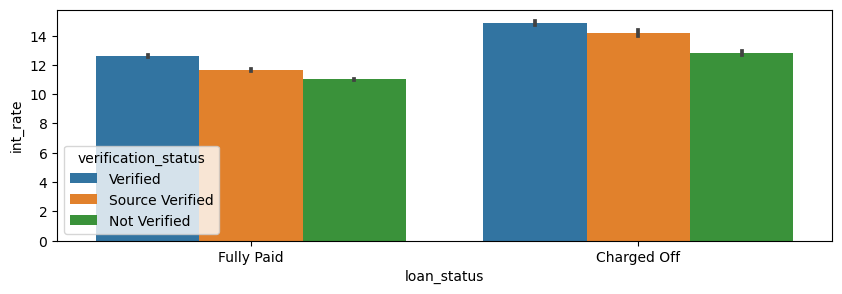

In [48]:
plt.figure(figsize=(10,3))
sns.barplot(x ='loan_status', y = 'int_rate',hue='verification_status',data=df) 

## Insights:
1. If the Interest rate is higher, the chances of charged Off is very high
2. Verification does nt matter for the Charged Off factors. so Verification_status is not having any relation with Charged Off

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

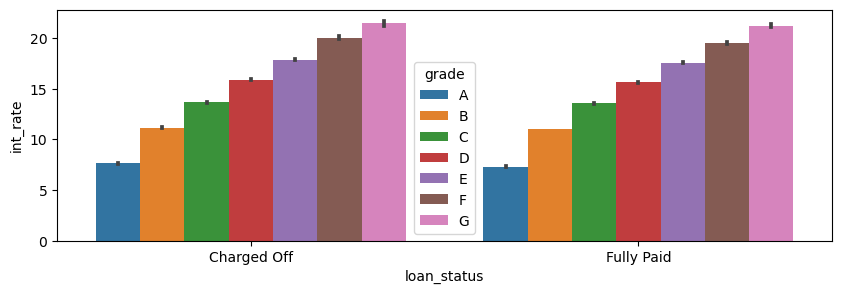

In [62]:
plt.figure(figsize=(10,3))
sns.barplot(x ='loan_status', y = 'int_rate',hue='grade',data=df.sort_values(by='grade')) 

## Insights:
Only Grade is not a strong indicator for Charged Off reasons. We should include sub_grade also for good clarity

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

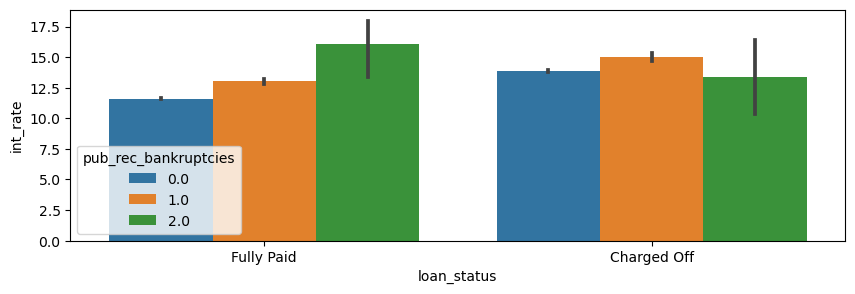

In [50]:
plt.figure(figsize=(10,3))
sns.barplot(x ='loan_status', y = 'int_rate',hue='pub_rec_bankruptcies',data=df) 

## Insights:
1. Persons those who already have 2 bankruptcies paid the loan properly and less chances of Charged Off
2. Persons those who doesn't have bankruptcies or with 1 bankruptcies are more chances of Charged Off

<AxesSubplot:xlabel='grade,sub_grade'>

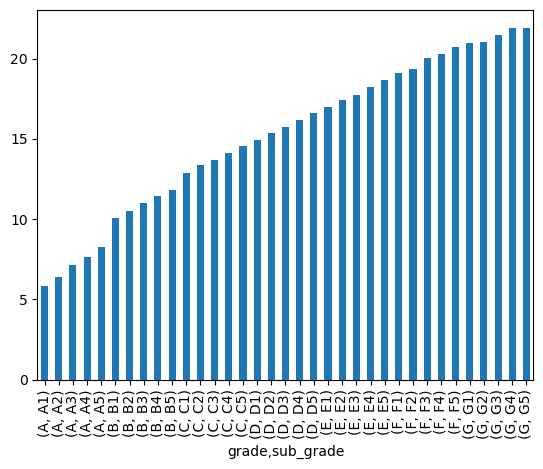

In [52]:
df.groupby(['grade','sub_grade'])['int_rate'].mean().plot(kind='bar')

### Insights:
1. From A to G , Interest rate is going in incremental pattern

<AxesSubplot:xlabel='annual_inc', ylabel='loan_status'>

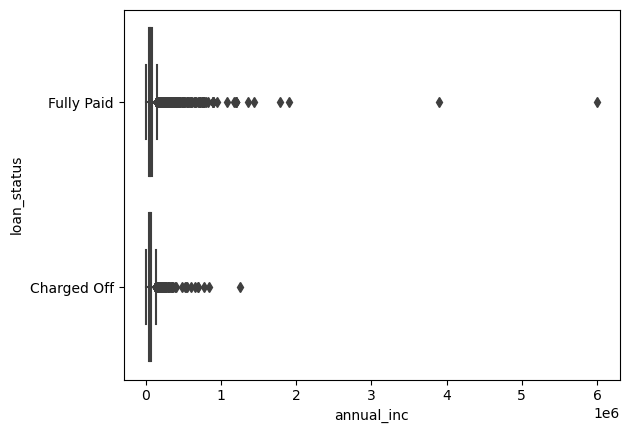

In [54]:
sns.boxplot(x=df['annual_inc'],y=df['loan_status'])

### Insights:
1. There is no strong indicator for annual_inc for the Charged Off Reasons

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

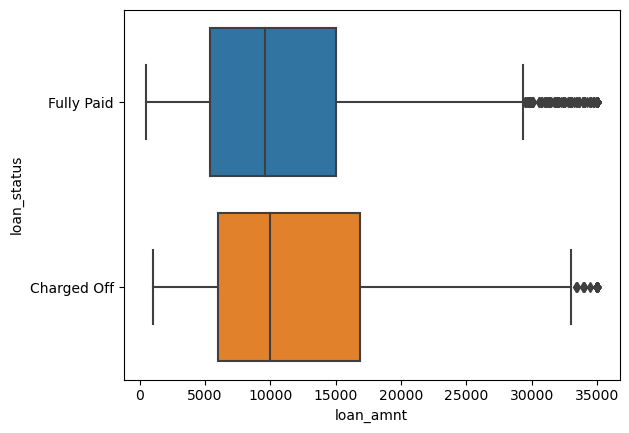

In [55]:
sns.boxplot(x=df['loan_amnt'],y=df['loan_status'])

### Insights :
1. When the loan amount is higher, the charged off is higher

<AxesSubplot:xlabel='purpose,loan_status'>

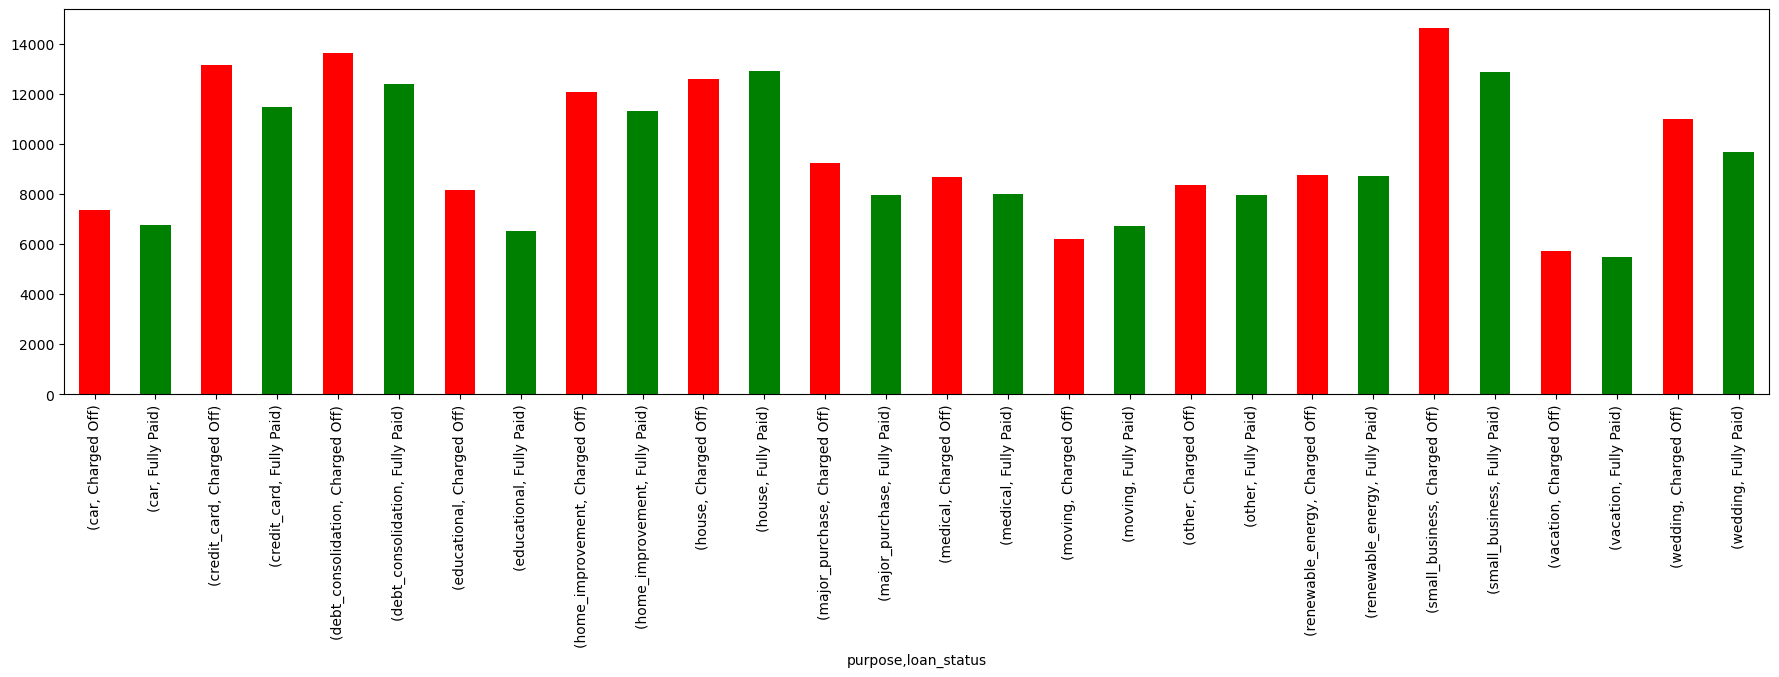

In [56]:
plt.figure(figsize=(22,5))
#sns.barplot(x=df['purpose'],y=df['loan_amnt'])
df.groupby(['purpose','loan_status'])['loan_amnt'].mean().plot(kind='bar',color=['red','green'])

### Insights from the Purpose column with Loan_Status:
1. Small Business, Education,Credit Card,Debt Consolidation, Wedding purposes have chances of very high default
2. House, Moving are good indicators of fully paid. 

## HEAT MAP

<AxesSubplot:xlabel='loan_status', ylabel='count'>

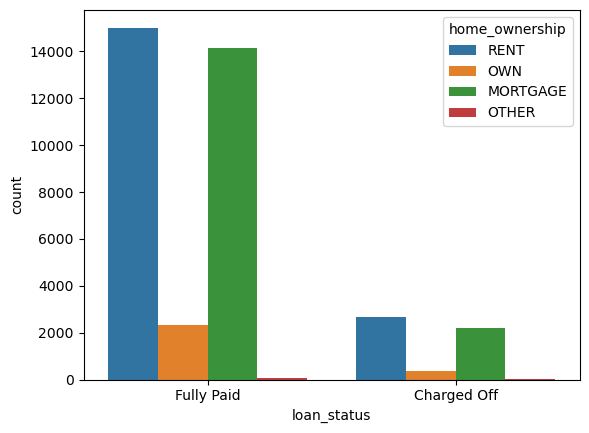

In [66]:
sns.countplot(x=df['loan_status'],hue=df['home_ownership'])

### Insights :
1. Those who are staying in Rent or Mortgage are the high indicators for Charged Off 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

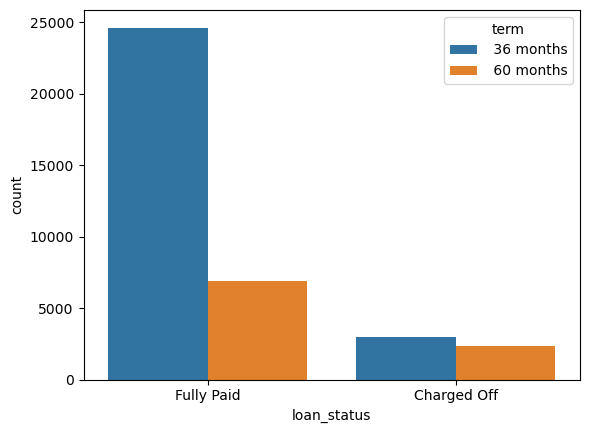

In [67]:
sns.countplot(x=df['loan_status'],hue=df['term'])

### Insights:
1. The higher term tenure is high indicator for Charged off

## HEAT MAP

<AxesSubplot:>

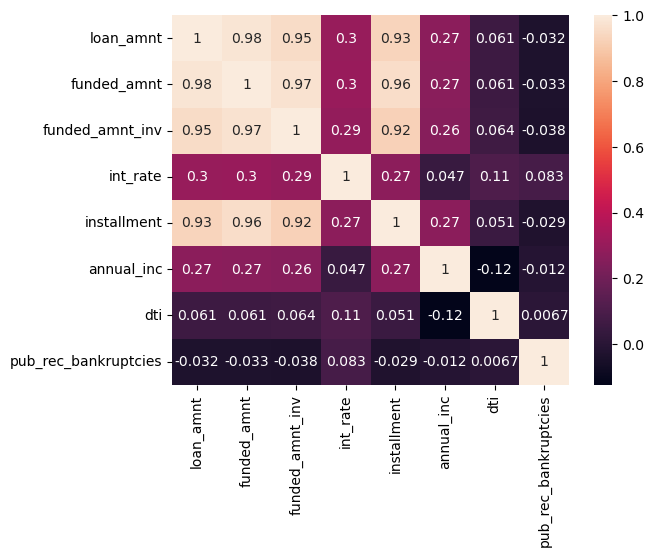

In [68]:
cont_cols=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','pub_rec_bankruptcies']
sns.heatmap(df[cont_cols].corr(),annot=True)

### Insights :
1. loan_amnt and installment have higher positive correlation.
2. Int_rate and annual_inc have lesser positive correlation with loan_amnt

## Final Conclusions :

1. The higher term tenure is high indicator for Charged off
2. Small Business, Education,Credit Card,Debt Consolidation, Wedding purposes have chances of very high default
3. Those who are staying in Rent or Mortgage are the high indicators for Charged Off
4. When the loan amount is higher, the charged off is higher
5. Persons those who doesn't have bankruptcies or with 1 bankruptcies are more chances of Charged Off
6. If the Interest rate is higher, the chances of charged Off is very high
7. For F sub_grades, Chargedoff is high than fully paid.